## Tarea 

### Ricardo Figueroa CU 112714

<ol>
<li> Algoritmo de aprendizaje del perceptrón </li>
<li> Hill climbing </li>
<li> Hill climbing en pesos con puntos de referencia </li>
<li> Jugar con los parámetros del sitio https://playground.tensorflow.orgyhttps://playground.tensorflow.orgyhttps://playground.tensorflow.orghttps://playground.tensorflow.org y anotar conclusiones.
 </li>
</ol>
Los últimos dos deben generar gráficas que describan la trayectoria del robot.

### 1. Perceptron

In [5]:
#Lets import some useful libraries
import csv
import numpy as np
import urllib
import pandas as pd
from random import seed
from random import randrange
import matplotlib.pyplot as plt

Below is a function called "predict" that predicts an output value for a given set of weights

In [6]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [7]:
# test predictions
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


Now we can train the weights. Below is a function named `train_weights` that calculates weigth values for a training dataset using stochastic gradient descent

In [8]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        # Iteration over each row
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            # Each variable weight is adjuted according to the error 
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

We can now test our functions

In [9]:
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


Now we will use the famously known dataset called "the sonar dataset"

In [10]:
# Lets download the dataset automatically, this will be stored in the same directory
sonar_data = urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', filename='sonar.all-data.csv')

In [11]:
# Lets get the dataset into an array
with open('sonar.all-data.csv','r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ',',
                           quotechar = '"')
    data = [data for data in data_iter]
data_array = np.asarray(data)

In [12]:
# Lets convert al columns except last one to float numbers
def convert_data(data_array):
    data_array_ex = data_array[:,:59].astype(float)
    data_response = np.array([1 if i=='R' else 0 for i in data_array[:,60]])
    complete_array = np.column_stack((data_array_ex,data_response))
    return complete_array

In [13]:
complete_data = convert_data(data_array)

In [14]:
# Function for the perceptron training
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)

In [15]:
# Cross validation function
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [16]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [17]:
def removearray(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')

In [18]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        removearray(train_set,fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [19]:
# Test the Perceptron algorithm on the sonar dataset
seed(1)
dataset = complete_data
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

>epoch=0, lrate=0.010, error=67.000
>epoch=1, lrate=0.010, error=56.000
>epoch=2, lrate=0.010, error=37.000
>epoch=3, lrate=0.010, error=43.000
>epoch=4, lrate=0.010, error=47.000
>epoch=5, lrate=0.010, error=45.000
>epoch=6, lrate=0.010, error=40.000
>epoch=7, lrate=0.010, error=41.000
>epoch=8, lrate=0.010, error=49.000
>epoch=9, lrate=0.010, error=37.000
>epoch=10, lrate=0.010, error=36.000
>epoch=11, lrate=0.010, error=36.000
>epoch=12, lrate=0.010, error=32.000
>epoch=13, lrate=0.010, error=37.000
>epoch=14, lrate=0.010, error=44.000
>epoch=15, lrate=0.010, error=42.000
>epoch=16, lrate=0.010, error=39.000
>epoch=17, lrate=0.010, error=32.000
>epoch=18, lrate=0.010, error=40.000
>epoch=19, lrate=0.010, error=38.000
>epoch=20, lrate=0.010, error=38.000
>epoch=21, lrate=0.010, error=38.000
>epoch=22, lrate=0.010, error=39.000
>epoch=23, lrate=0.010, error=32.000
>epoch=24, lrate=0.010, error=34.000
>epoch=25, lrate=0.010, error=32.000
>epoch=26, lrate=0.010, error=32.000
>epoch=27, 

>epoch=271, lrate=0.010, error=14.000
>epoch=272, lrate=0.010, error=16.000
>epoch=273, lrate=0.010, error=24.000
>epoch=274, lrate=0.010, error=23.000
>epoch=275, lrate=0.010, error=20.000
>epoch=276, lrate=0.010, error=15.000
>epoch=277, lrate=0.010, error=23.000
>epoch=278, lrate=0.010, error=23.000
>epoch=279, lrate=0.010, error=20.000
>epoch=280, lrate=0.010, error=17.000
>epoch=281, lrate=0.010, error=20.000
>epoch=282, lrate=0.010, error=13.000
>epoch=283, lrate=0.010, error=20.000
>epoch=284, lrate=0.010, error=25.000
>epoch=285, lrate=0.010, error=8.000
>epoch=286, lrate=0.010, error=23.000
>epoch=287, lrate=0.010, error=16.000
>epoch=288, lrate=0.010, error=23.000
>epoch=289, lrate=0.010, error=23.000
>epoch=290, lrate=0.010, error=20.000
>epoch=291, lrate=0.010, error=25.000
>epoch=292, lrate=0.010, error=16.000
>epoch=293, lrate=0.010, error=21.000
>epoch=294, lrate=0.010, error=18.000
>epoch=295, lrate=0.010, error=28.000
>epoch=296, lrate=0.010, error=22.000
>epoch=297, l

>epoch=0, lrate=0.010, error=57.000
>epoch=1, lrate=0.010, error=41.000
>epoch=2, lrate=0.010, error=38.000
>epoch=3, lrate=0.010, error=39.000
>epoch=4, lrate=0.010, error=36.000
>epoch=5, lrate=0.010, error=33.000
>epoch=6, lrate=0.010, error=37.000
>epoch=7, lrate=0.010, error=34.000
>epoch=8, lrate=0.010, error=38.000
>epoch=9, lrate=0.010, error=32.000
>epoch=10, lrate=0.010, error=38.000
>epoch=11, lrate=0.010, error=33.000
>epoch=12, lrate=0.010, error=31.000
>epoch=13, lrate=0.010, error=36.000
>epoch=14, lrate=0.010, error=32.000
>epoch=15, lrate=0.010, error=31.000
>epoch=16, lrate=0.010, error=28.000
>epoch=17, lrate=0.010, error=36.000
>epoch=18, lrate=0.010, error=30.000
>epoch=19, lrate=0.010, error=25.000
>epoch=20, lrate=0.010, error=29.000
>epoch=21, lrate=0.010, error=32.000
>epoch=22, lrate=0.010, error=24.000
>epoch=23, lrate=0.010, error=30.000
>epoch=24, lrate=0.010, error=26.000
>epoch=25, lrate=0.010, error=33.000
>epoch=26, lrate=0.010, error=26.000
>epoch=27, 

>epoch=325, lrate=0.010, error=16.000
>epoch=326, lrate=0.010, error=16.000
>epoch=327, lrate=0.010, error=16.000
>epoch=328, lrate=0.010, error=18.000
>epoch=329, lrate=0.010, error=20.000
>epoch=330, lrate=0.010, error=17.000
>epoch=331, lrate=0.010, error=12.000
>epoch=332, lrate=0.010, error=19.000
>epoch=333, lrate=0.010, error=25.000
>epoch=334, lrate=0.010, error=25.000
>epoch=335, lrate=0.010, error=24.000
>epoch=336, lrate=0.010, error=19.000
>epoch=337, lrate=0.010, error=18.000
>epoch=338, lrate=0.010, error=16.000
>epoch=339, lrate=0.010, error=18.000
>epoch=340, lrate=0.010, error=19.000
>epoch=341, lrate=0.010, error=19.000
>epoch=342, lrate=0.010, error=12.000
>epoch=343, lrate=0.010, error=20.000
>epoch=344, lrate=0.010, error=22.000
>epoch=345, lrate=0.010, error=17.000
>epoch=346, lrate=0.010, error=14.000
>epoch=347, lrate=0.010, error=18.000
>epoch=348, lrate=0.010, error=18.000
>epoch=349, lrate=0.010, error=14.000
>epoch=350, lrate=0.010, error=12.000
>epoch=351, 

>epoch=51, lrate=0.010, error=18.000
>epoch=52, lrate=0.010, error=26.000
>epoch=53, lrate=0.010, error=28.000
>epoch=54, lrate=0.010, error=24.000
>epoch=55, lrate=0.010, error=32.000
>epoch=56, lrate=0.010, error=22.000
>epoch=57, lrate=0.010, error=26.000
>epoch=58, lrate=0.010, error=20.000
>epoch=59, lrate=0.010, error=25.000
>epoch=60, lrate=0.010, error=29.000
>epoch=61, lrate=0.010, error=30.000
>epoch=62, lrate=0.010, error=31.000
>epoch=63, lrate=0.010, error=23.000
>epoch=64, lrate=0.010, error=24.000
>epoch=65, lrate=0.010, error=28.000
>epoch=66, lrate=0.010, error=38.000
>epoch=67, lrate=0.010, error=24.000
>epoch=68, lrate=0.010, error=29.000
>epoch=69, lrate=0.010, error=23.000
>epoch=70, lrate=0.010, error=29.000
>epoch=71, lrate=0.010, error=26.000
>epoch=72, lrate=0.010, error=32.000
>epoch=73, lrate=0.010, error=33.000
>epoch=74, lrate=0.010, error=20.000
>epoch=75, lrate=0.010, error=28.000
>epoch=76, lrate=0.010, error=30.000
>epoch=77, lrate=0.010, error=22.000
>

>epoch=345, lrate=0.010, error=10.000
>epoch=346, lrate=0.010, error=18.000
>epoch=347, lrate=0.010, error=17.000
>epoch=348, lrate=0.010, error=18.000
>epoch=349, lrate=0.010, error=22.000
>epoch=350, lrate=0.010, error=14.000
>epoch=351, lrate=0.010, error=16.000
>epoch=352, lrate=0.010, error=12.000
>epoch=353, lrate=0.010, error=16.000
>epoch=354, lrate=0.010, error=20.000
>epoch=355, lrate=0.010, error=17.000
>epoch=356, lrate=0.010, error=19.000
>epoch=357, lrate=0.010, error=25.000
>epoch=358, lrate=0.010, error=17.000
>epoch=359, lrate=0.010, error=13.000
>epoch=360, lrate=0.010, error=17.000
>epoch=361, lrate=0.010, error=18.000
>epoch=362, lrate=0.010, error=12.000
>epoch=363, lrate=0.010, error=16.000
>epoch=364, lrate=0.010, error=12.000
>epoch=365, lrate=0.010, error=19.000
>epoch=366, lrate=0.010, error=20.000
>epoch=367, lrate=0.010, error=19.000
>epoch=368, lrate=0.010, error=14.000
>epoch=369, lrate=0.010, error=18.000
>epoch=370, lrate=0.010, error=14.000
>epoch=371, 

### 2. Hill climbing

In [20]:
import math 


fabs=math.fabs
sin=math.sin
cos=math.cos
exp=math.exp
pi=math.pi

#scalar multiple for grad-ascent
scalar=0.005

# I am doing gradient ascent here, since I want to maximize the function
def grad_ascent(x):
    
    #for func1
    #delta_x = -2.0*x

    #for func2
    #delta_x = -2.0*x*exp(-x*x)

    #for func3
    delta_x =  (exp(-x*x)*(6.0*sin(3*pi*x)*cos(3*pi*x)) - 2.0*x*sin(3.0*pi*x)*exp(-x*x))

    #for func4
    #scalar=0.008
    #delta_x = -exp(-x) + exp(x)
    
    return x + (scalar*delta_x)

# simple objective functions with
# one global maxima and no local minima
def func1(x):
    return -x*x

def func2(x):
    return exp(-x*x)

#local/global maxima
def func3(x):
    return exp(-x*x)*(sin(3.0*pi*x)**2)

#with a plateau in between
def func4(x):
    return (1.0 + exp(-x)) + (1.0 + exp(x))


#Definition of the simple hill climbing search
def hill_climb(objfunc,x,next_move):
    current = x
    result_array = []
    x_array = []
    while True:

        current_val=objfunc(current)
        next = next_move(current)
        if objfunc(next) > current_val:
            current = next
            #print(current,current_val)
            result_array.append(current_val)
            x_array.append(current)
        else:
            break;
    return(x_array,result_array)

if __name__=='__main__':
    x_init = 0.95 # Hill climbing stops at the nearest hill it finds.

    # call the hill_climb function with the function
    # you want to optimize, the initial point and the 'move'
    # method, that you want to use for moving to a nearby solution
    result1 = hill_climb(func3,x_init,grad_ascent) 
    x_result1 = result1[0]
    function_result1 = result1[1]
    
#     result2 = hill_climb(func2,x_init,grad_ascent) 
#     x_result2 = result2[0]
#     function_result2 = result2[1]
    
#     result3 = hill_climb(func3,x_init,grad_ascent) 
#     x_result3 = result3[0]
#     function_result3 = result3[1]
    
#     result4 = hill_climb(func4,x_init,grad_ascent) 
#     x_result4 = result4[0]
#     function_result4 = result4[1]    

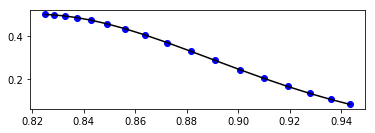

In [237]:
# Function I
t1 = x_result1
# t2 = x_result2
# t3 = x_result3
# t4 = x_result4

f_t1 = function_result1
# f_t2 = function_result2
# f_t3 = function_result3
# f_t4 = function_result4

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f_t1, 'bo', t1, f_t1, 'k')


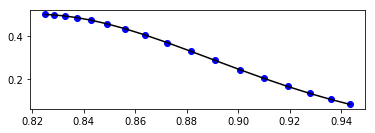

In [238]:
# Function II
t1 = x_result1
# t2 = x_result2
# t3 = x_result3
# t4 = x_result4

f_t1 = function_result1
# f_t2 = function_result2
# f_t3 = function_result3
# f_t4 = function_result4

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f_t1, 'bo', t1, f_t1, 'k')

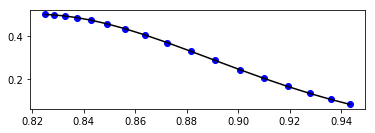

In [239]:
# Function III
t1 = x_result1
# t2 = x_result2
# t3 = x_result3
# t4 = x_result4

f_t1 = function_result1
# f_t2 = function_result2
# f_t3 = function_result3
# f_t4 = function_result4

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f_t1, 'bo', t1, f_t1, 'k')

### 3. Hill Climbing con Puntos de referencia

In [21]:
puntos_referencia = [-0.25 ,0.05, 0.35, 0.65, 0.95, 1.25]
x_final = np.array([])
function_result = np.array([])
for i in puntos_referencia:
    result = hill_climb(func3,i,grad_ascent)
    x_final = np.append(x_final, result[0])
    print(x_final)
    function_result = np.append(function_result, result[1])

[-0.23756947 -0.22554238 -0.21459658 -0.20518861 -0.19747866 -0.19138288
 -0.18668212 -0.18311635 -0.18043995 -0.1784445  -0.17696308 -0.17586628
 -0.17505568 -0.17445733 -0.17401599 -0.17369065 -0.1734509  -0.17327429
 -0.1731442  -0.1730484  -0.17297786 -0.17292591 -0.17288767 -0.17285951
 -0.17283878 -0.17282352 -0.17281228 -0.17280401 -0.17279792 -0.17279344
 -0.17279013 -0.17278771 -0.17278592 -0.1727846  -0.17278363 -0.17278292
 -0.17278239 -0.172782   -0.17278172 -0.17278151 -0.17278136 -0.17278124
 -0.17278116 -0.1727811  -0.17278105 -0.17278102 -0.17278099 -0.17278098
 -0.17278096 -0.17278095 -0.17278095 -0.17278094 -0.17278094 -0.17278093
 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093
 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093
 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093
 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0.17278093
 -0.17278093 -0.17278093 -0.17278093 -0.17278093 -0

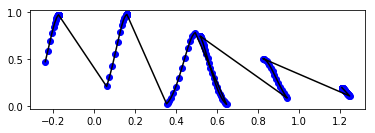

In [23]:
plt.figure(1)
plt.subplot(211)
plt.plot(x_final, function_result, 'bo', x_final, function_result, 'k')

### 4. Jugar con Tensorflow

#### Descripción de la aplicación:
La aplicación es un modelo interactivo de redes neuronales con el cual se pueden intentar resolver problemas de regresión o de clasificación . Además se puede jugar con los siguientes parámetros:
<ol>
<li> Distribución de los datos o dataset </li>
<li> Ratio of training to test, al momento de hacer cross-validation.</li>
<li> Ruido en los datos: que tanto se mezclan los datos entre sí, subiendo el nivel de dificultad al intentar resolver el problema de clasificación.</li>
<li> Batch Size: El tamaño de las muestras en el epoch. </li>
<li> Número de variables.</li>
<li> El número de hidden layers. </li>
<li> El número de output layers. </li>
<li> El "learning rate" o la tasa a la cual se ajusta el modelo al entrenarse. </li>
<li> La función de activactión. </li>
<li> La función de regularización. </li>
<li> La tasa de regulariación. </li>
</ol>
Las distintas observaciones están separadas por colores entre azul y naranja y la interfaz al ejecutar muestra cómo el algoritmo logra la clasificación o regresión de los datos.
Las connexiones entre las capas también se iluminan de ciertos colores dependiendo de si el peso contribuye a que la clasificación sea positiva o negativa.
Cómo observaciones generales acerca de los parámetros se puede concluir lo siguiente:
<ol>
<li> El ruido afecta en gran medida al error. </li>
<li> El modelo se estabiliza dependiendo de la configuración de los datos, sin importar que se prolongue el tiempo de ejecución o el numero de "epochs". </li>
<li> El ruido afecta en gran medida al error. Y se puede observar de cierta manera una relación entre el ruido y el error</li>
<li> El número de capas no necesariamente disminuye el error.</li>
<ol>